In [38]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Chi -Square Test
# Linear Regression
# Regression Tree
# Decision Tree
# Random Forest
# XG BOOST
# ADA BOOSTING
# Gradient Boosting

In [3]:
supply_df = pd.read_csv('C:/Users/chimi/Desktop/Python Data Science Projects/Supply Chain Optimization/Untitled Folder 1/supply_final.csv')

In [4]:
supply_df

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,binned_Competitor_in_mkt,binned_retail_shop_num,binned_distributor_num,binned_dist_from_hub,binned_workers_num,binned_storage_issue_reported_l3m,binned_wh_breakdown_l3m,binned_govt_check_l3m,binned_product_wg_ton,binned_wh_age
0,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,...,"(-0.012, 2.4]","(3658.4, 5495.8]","(14.945, 26.0]","(54.784, 98.2]","(27.6, 45.2]","(7.8, 15.6]","(4.8, 6.0]","(13.4, 19.6]","(12682.2, 23299.4]","(10.8, 16.2]"
1,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,...,"(2.4, 4.8]","(5495.8, 7333.2]","(37.0, 48.0]","(184.6, 227.8]","(27.6, 45.2]","(-0.039, 7.8]","(2.4, 3.6]","(13.4, 19.6]","(2011.914, 12682.2]","(10.8, 16.2]"
2,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,...,"(2.4, 4.8]","(3658.4, 5495.8]","(59.0, 70.0]","(141.4, 184.6]","(27.6, 45.2]","(15.6, 23.4]","(4.8, 6.0]","(19.6, 25.8]","(12682.2, 23299.4]","(10.8, 16.2]"
3,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,...,"(-0.012, 2.4]","(5495.8, 7333.2]","(48.0, 59.0]","(98.2, 141.4]","(9.912, 27.6]","(15.6, 23.4]","(2.4, 3.6]","(25.8, 32.0]","(12682.2, 23299.4]","(10.8, 16.2]"
4,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,...,"(-0.012, 2.4]","(3658.4, 5495.8]","(37.0, 48.0]","(98.2, 141.4]","(9.912, 27.6]","(15.6, 23.4]","(4.8, 6.0]","(19.6, 25.8]","(23299.4, 33916.6]","(10.8, 16.2]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,Rural,Small,North,Zone 1,3,0,4,5390,Rented,19,...,"(2.4, 4.8]","(3658.4, 5495.8]","(14.945, 26.0]","(141.4, 184.6]","(27.6, 45.2]","(15.6, 23.4]","(1.2, 2.4]","(25.8, 32.0]","(23299.4, 33916.6]","(16.2, 21.6]"
24996,Rural,Mid,West,Zone 2,6,0,4,4490,Company Owned,57,...,"(2.4, 4.8]","(3658.4, 5495.8]","(48.0, 59.0]","(98.2, 141.4]","(27.6, 45.2]","(7.8, 15.6]","(3.6, 4.8]","(13.4, 19.6]","(2011.914, 12682.2]","(10.8, 16.2]"
24997,Urban,Large,South,Zone 5,7,0,2,5403,Rented,31,...,"(-0.012, 2.4]","(3658.4, 5495.8]","(26.0, 37.0]","(141.4, 184.6]","(27.6, 45.2]","(15.6, 23.4]","(4.8, 6.0]","(19.6, 25.8]","(23299.4, 33916.6]","(10.8, 16.2]"
24998,Rural,Small,North,Zone 1,1,0,2,10562,Rented,25,...,"(-0.012, 2.4]","(9170.6, 11008.0]","(14.945, 26.0]","(54.784, 98.2]","(9.912, 27.6]","(15.6, 23.4]","(4.8, 6.0]","(25.8, 32.0]","(23299.4, 33916.6]","(10.8, 16.2]"


In [5]:
# Drop the bin columns
columns_to_drop = ['binned_num_refill_req_l3m', 'binned_Competitor_in_mkt', 'binned_retail_shop_num',
                   'binned_distributor_num', 'binned_dist_from_hub', 'binned_workers_num',
                   'binned_storage_issue_reported_l3m', 'binned_wh_breakdown_l3m',
                   'binned_govt_check_l3m', 'binned_product_wg_ton', 'binned_wh_age']

supply_df = supply_df.drop(columns=columns_to_drop)


In [6]:
supply_df['approved_wh_govt_certificate'].value_counts()

C          5501
B+         4917
B          4812
A          4671
A+         4191
Unknown     908
Name: approved_wh_govt_certificate, dtype: int64

In [7]:
supply_df['WH_capacity_size'].value_counts()

Large    10169
Mid      10020
Small     4811
Name: WH_capacity_size, dtype: int64

In [8]:
supply_df['wh_owner_type'].value_counts()

Company Owned    13578
Rented           11422
Name: wh_owner_type, dtype: int64

In [9]:
# Oridinal encoding for Certifications
ordinal_map_cert = {
    'A+': 1,
    'A': 2,
    'B+': 3,
    'B': 4,
    'C': 5,
    'Unknown': 6
}
supply_df['approved_wh_govt_certificate'] = supply_df['approved_wh_govt_certificate'].map(ordinal_map_cert)


In [10]:
# One hot encoding 
ordinal_map_size= {
    'Large': 3,
    'Mid':2,
    'Small':1
}
supply_df['WH_capacity_size'] = supply_df['WH_capacity_size'].map(ordinal_map_size)


In [11]:
supply_df['Location_type'].value_counts()

Rural    22957
Urban     2043
Name: Location_type, dtype: int64

In [12]:
# One-hot encode Location_Type and drop the original column
supply_df = pd.get_dummies(supply_df, columns=['Location_type'], prefix='Location', drop_first=True)

In [13]:
# Encode other variables with no inherent order

# One-hot encode zone and drop the original column
supply_df = pd.get_dummies(supply_df, columns=['zone'], prefix='Zone', drop_first=True)

# One-hot encode WH_regional_zone and drop the original column
supply_df = pd.get_dummies(supply_df, columns=['WH_regional_zone'], prefix='Regional_Zone', drop_first=True)


# One-hot encode wh_owner_type
supply_df = pd.get_dummies(supply_df, columns=['wh_owner_type'], prefix='Owner_Type')


In [16]:
supply_df.head(5)

,WH_capacity_size,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,...,Zone_North,Zone_South,Zone_West,Regional_Zone_Zone 2,Regional_Zone_Zone 3,Regional_Zone_Zone 4,Regional_Zone_Zone 5,Regional_Zone_Zone 6,Owner_Type_Company Owned,Owner_Type_Rented
0,1,3,1,2,4651,24,0,1,1,91,...,0,0,1,0,0,0,0,1,0,1
1,3,0,0,4,6217,47,0,0,1,210,...,1,0,0,0,0,0,1,0,1,0
2,2,1,0,4,4306,64,0,0,0,161,...,0,1,0,1,0,0,0,0,1,0
3,2,7,4,2,6000,50,0,0,0,103,...,1,0,0,0,1,0,0,0,0,1
4,3,3,1,2,4740,42,1,0,1,112,...,1,0,0,0,0,0,1,0,1,0


In [18]:
supply_df.columns

Index(['WH_capacity_size', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'distributor_num',
       'flood_impacted', 'flood_proof', 'electric_supply', 'dist_from_hub',
       'workers_num', 'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton', 'wh_age', 'Location_Urban', 'Zone_North',
       'Zone_South', 'Zone_West', 'Regional_Zone_Zone 2',
       'Regional_Zone_Zone 3', 'Regional_Zone_Zone 4', 'Regional_Zone_Zone 5',
       'Regional_Zone_Zone 6', 'Owner_Type_Company Owned',
       'Owner_Type_Rented'],
      dtype='object')

In [19]:
supply_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   WH_capacity_size              25000 non-null  int64  
 1   num_refill_req_l3m            25000 non-null  int64  
 2   transport_issue_l1y           25000 non-null  int64  
 3   Competitor_in_mkt             25000 non-null  int64  
 4   retail_shop_num               25000 non-null  int64  
 5   distributor_num               25000 non-null  int64  
 6   flood_impacted                25000 non-null  int64  
 7   flood_proof                   25000 non-null  int64  
 8   electric_supply               25000 non-null  int64  
 9   dist_from_hub                 25000 non-null  int64  
 10  workers_num                   25000 non-null  float64
 11  storage_issue_reported_l3m    25000 non-null  int64  
 12  temp_reg_mach                 25000 non-null  int64  
 13  a

In [22]:
# Categorical variables

p_corr = supply_df.corrwith(supply_df['product_wg_ton'], method='pearson')
s_corr = supply_df.corrwith(supply_df['product_wg_ton'], method='spearman')

# Extract the result for discrete and continuous numerical variables
numerical_cols = [
    'WH_capacity_size', 'num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num',
    'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply', 'dist_from_hub', 
    'storage_issue_reported_l3m', 'temp_reg_mach', 'approved_wh_govt_certificate', 'wh_breakdown_l3m', 
    'govt_check_l3m', 'product_wg_ton', 'workers_num', 'wh_age'
]

p_results = pearson_correlations[numerical_cols]
s_results = spearman_correlations[numerical_cols]

p_results, s_results

(WH_capacity_size                0.004425
 num_refill_req_l3m              0.001415
 transport_issue_l1y            -0.173992
 Competitor_in_mkt               0.008884
 retail_shop_num                -0.006615
 distributor_num                 0.004999
 flood_impacted                 -0.002299
 flood_proof                    -0.000441
 electric_supply                -0.002160
 dist_from_hub                  -0.005017
 storage_issue_reported_l3m      0.986777
 temp_reg_mach                   0.101638
 approved_wh_govt_certificate   -0.255978
 wh_breakdown_l3m                0.342685
 govt_check_l3m                 -0.008500
 product_wg_ton                  1.000000
 workers_num                    -0.008072
 wh_age                          0.604957
 dtype: float64,
 WH_capacity_size                0.002096
 num_refill_req_l3m              0.003105
 transport_issue_l1y            -0.169194
 Competitor_in_mkt               0.009789
 retail_shop_num                -0.007537
 distributor_num 

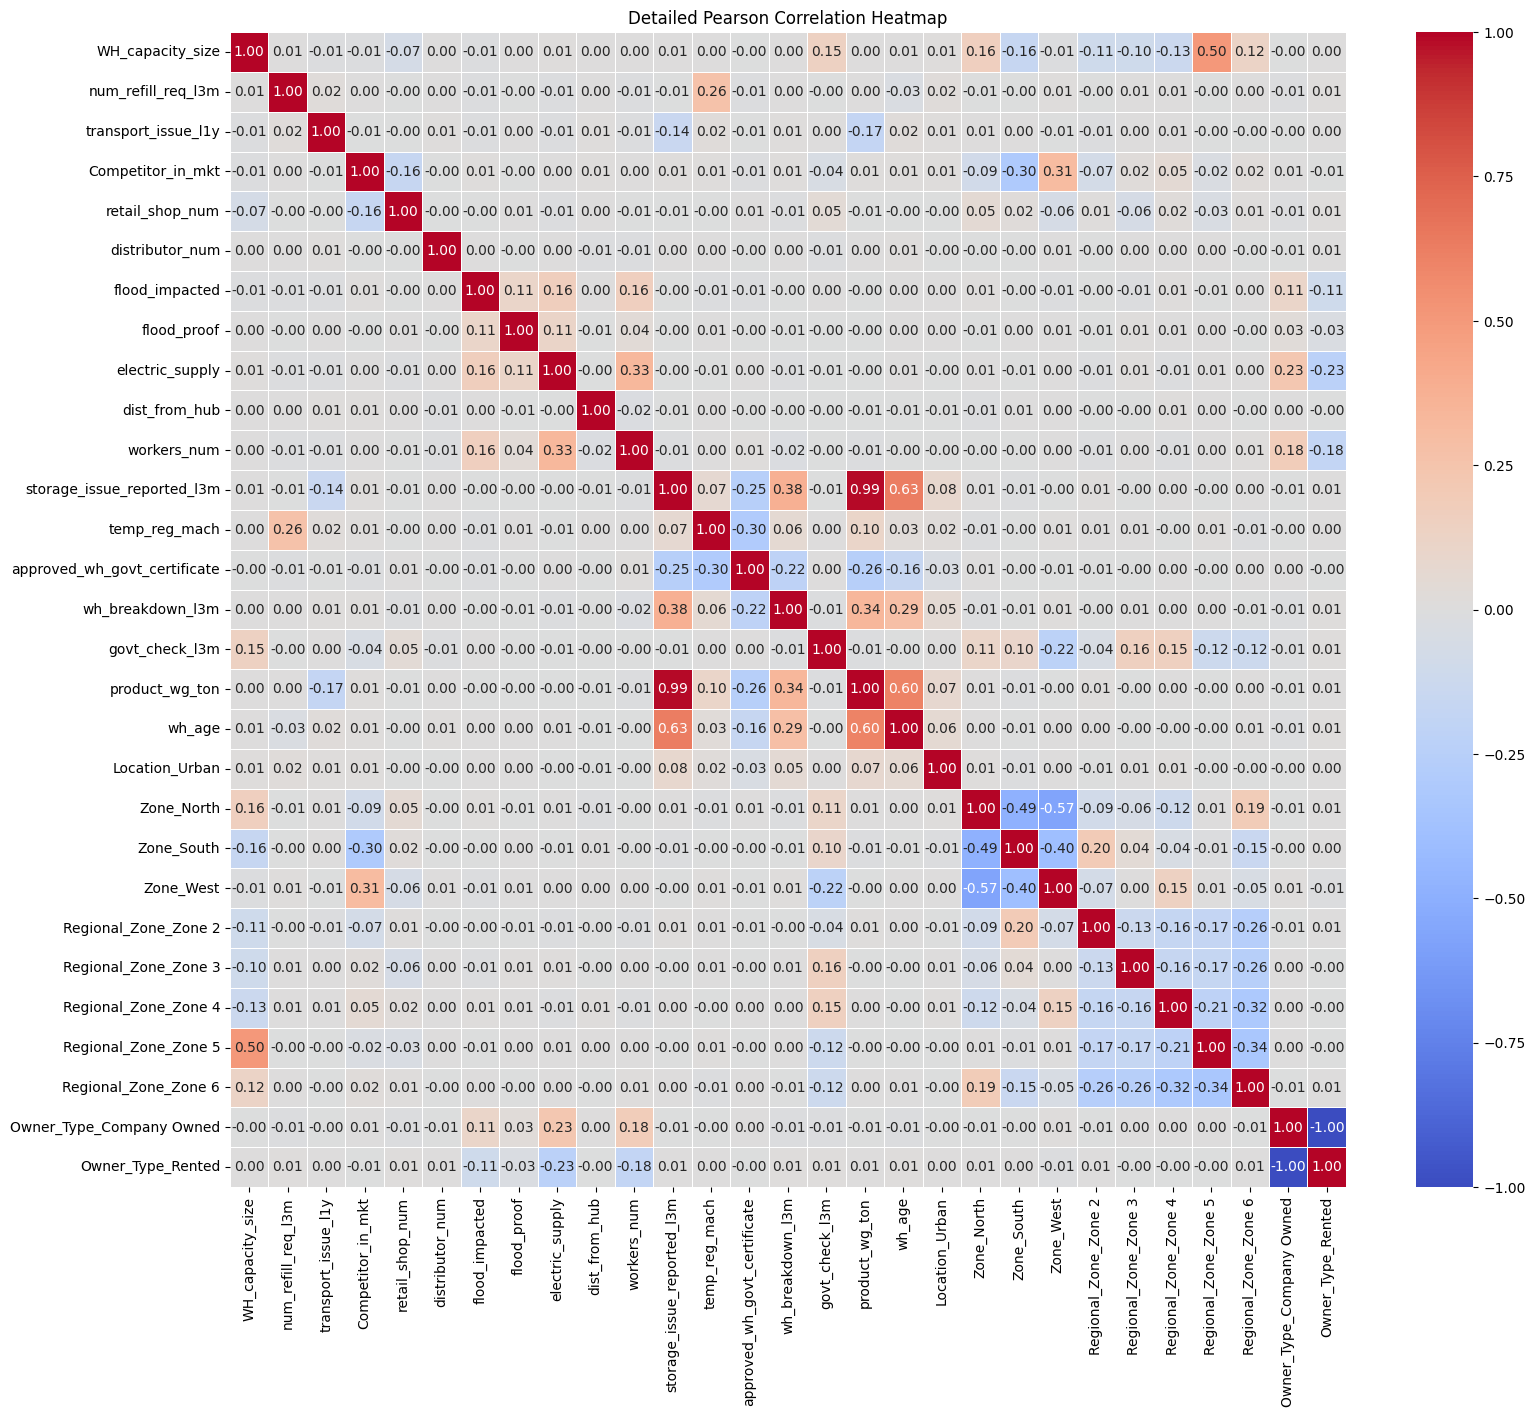

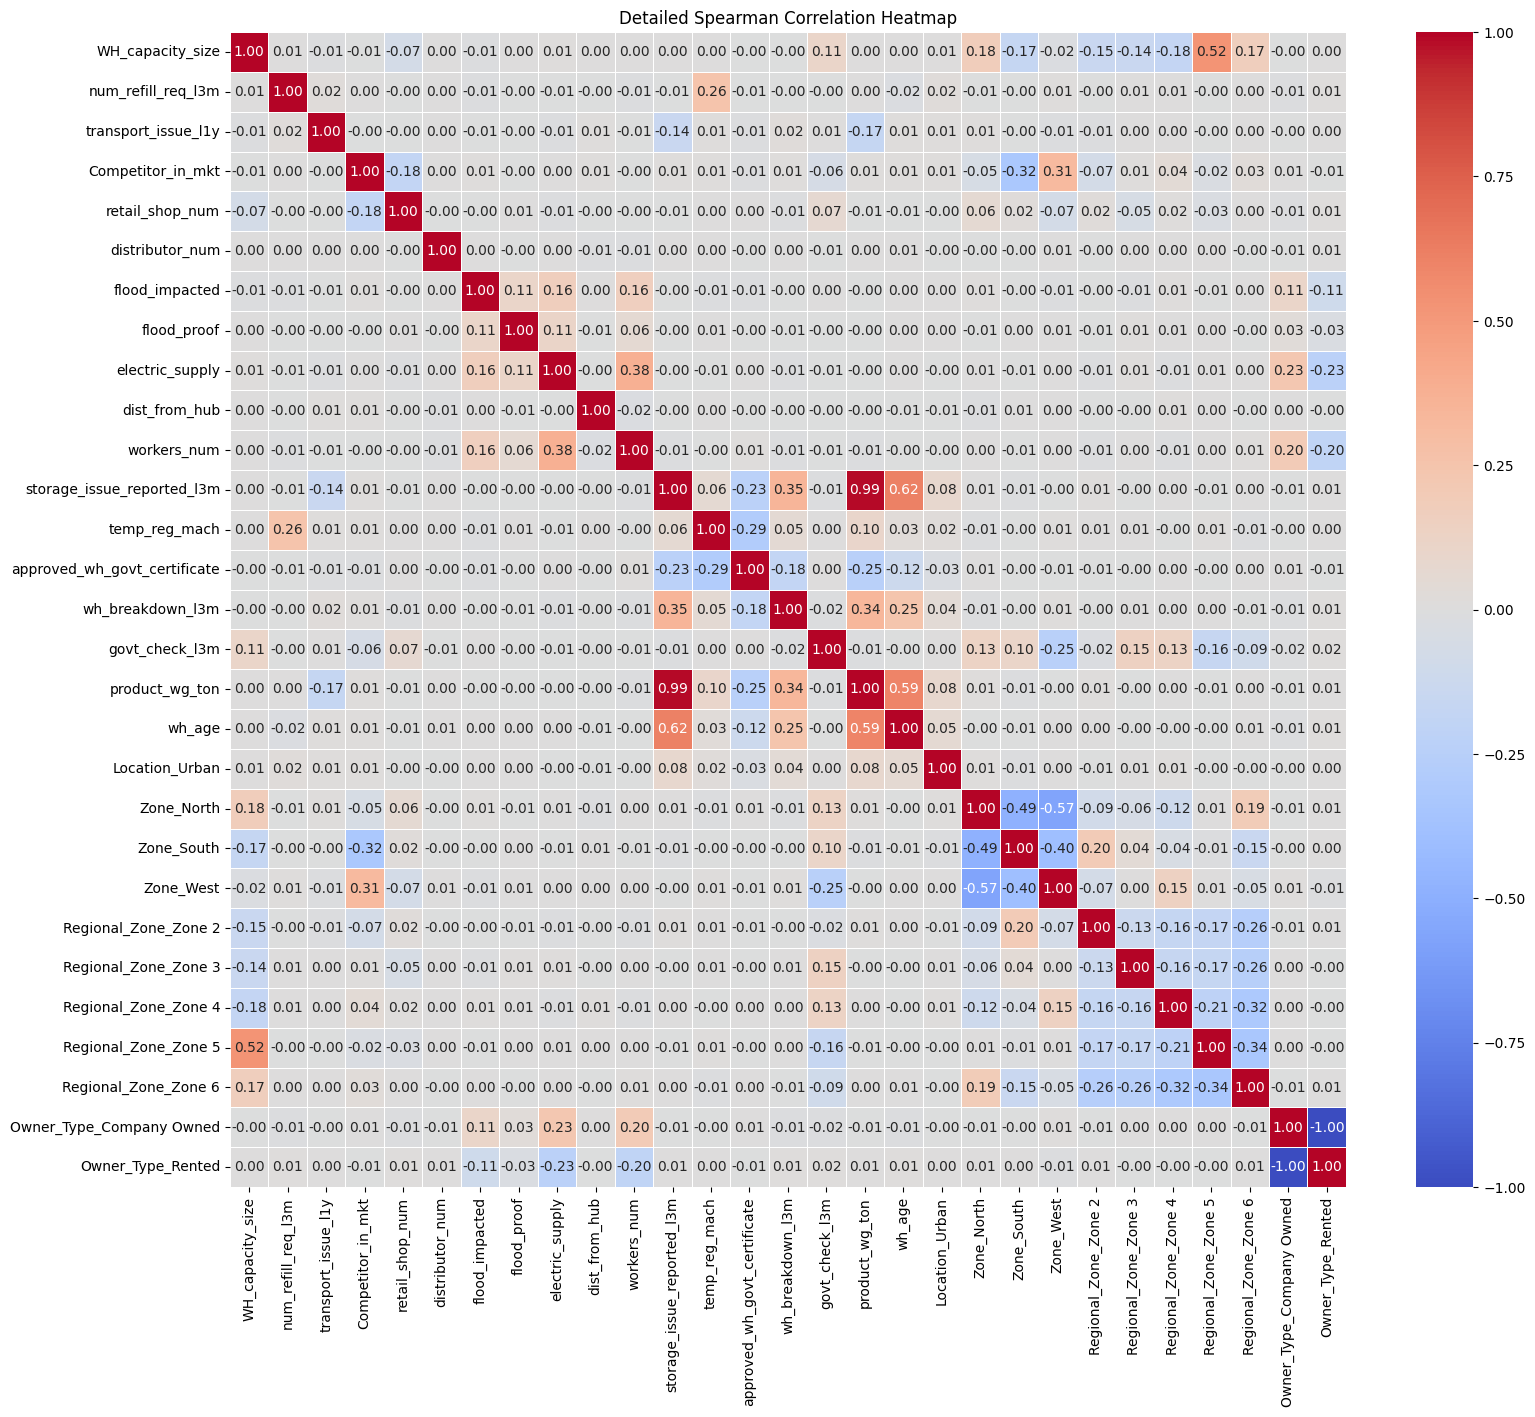

In [41]:
# Compute the full Pearson and Spearman correlation matrices
pc_matrix = supply_df.corr(method='pearson')
sc_matrix = supply_df.corr(method='spearman')




# Set up the figure for a detailed Spearman correlation heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(pc_matrix, cmap='coolwarm', center=0, annot=True, fmt=".2f", linewidths=0.5)
plt.title('Detailed Pearson Correlation Heatmap')
plt.show()

# Set up the figure for a detailed Spearman correlation heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(sc_matrix, cmap='coolwarm', center=0, annot=True, fmt=".2f", linewidths=0.5)
plt.title('Detailed Spearman Correlation Heatmap')
plt.show()




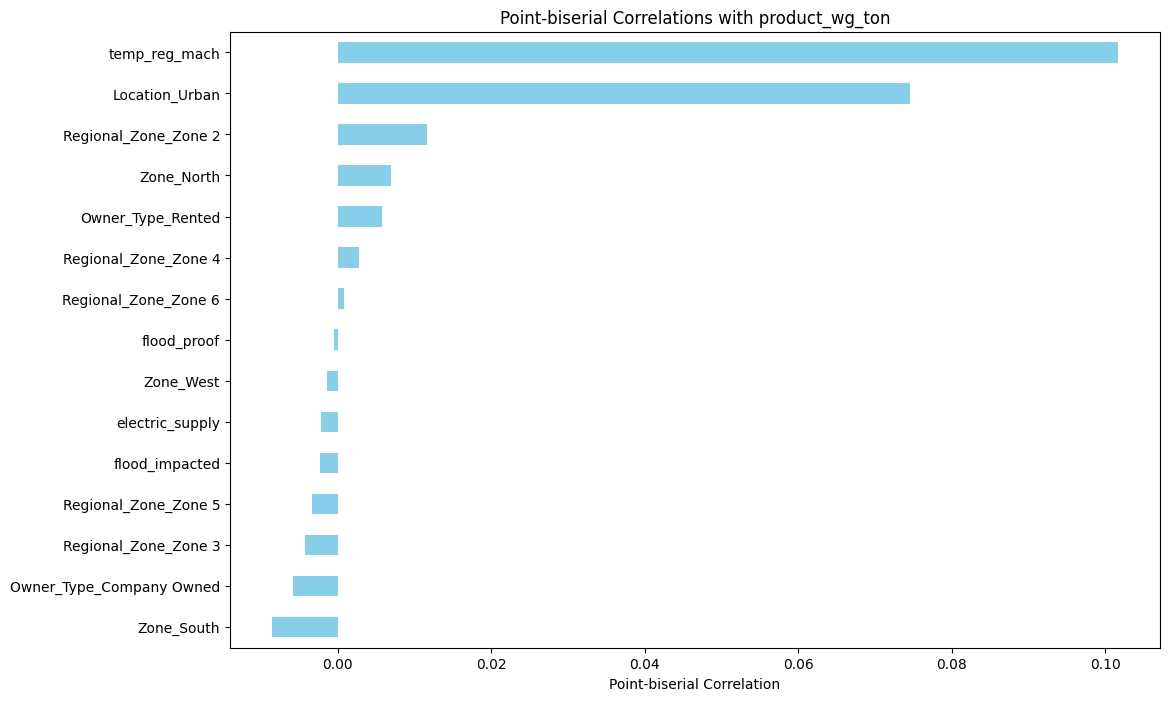

In [42]:
# Point -biserial corrrleation for binary categorical variables
b_cols = [col for col in supply_df.columns if supply_df[col].nunique() == 2]

# Extracting Point-biserial correlation values from the Pearson correlations computed earlier
pb_corr = pearson_correlations[b_cols]


# Set up the figure for Point-biserial correlation visualization
plt.figure(figsize=(12, 8))
pb_corr.sort_values().plot(kind='barh', color='skyblue')
plt.title('Point-biserial Correlations with product_wg_ton')
plt.xlabel('Point-biserial Correlation')
plt.show()

In [29]:
# Perform A-Nova for multi-class categorical variables

# Identify the multi-class categorical variables columns in the datasdet
mc_columns = ['WH_capacity_size', 'Competitor_in_mkt']
#
anova_results = {}


for col in mc_columns:
    # Perform ANOVA
    model = ols(f'product_wg_ton ~ C({col})', data=supply_df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    
    # Extract F-statistic and p-value
    f_statistic = anova_table["F"][0]
    p_value = anova_table["PR(>F)"][0]
    
    anova_results[col] = (f_statistic, p_value)

anova_results

{'WH_capacity_size': (1.1055247086419462, 0.33105332353276035),
 'Competitor_in_mkt': (1.4867805060112977, 0.1285517017044823)}